**Capital Asset Pricing Model (CAPM)** is probably the most widely used model
in assets pricing. There are several reasons behind its popularity. 
* First, it is quite simple since it is a one-factor linear model.
* Second, it is quite easy to implement this one-factor model. Any interested reader could download historical price data for a
listed company and market index data to calculate return first, and then estimate the
market risk for the stock. 
* Third, this simplest one-factor asset pricing model could
be served as the first model for other more advanced ones, such as Fama-French
3-factor, Fama-French-Carhart 4-factor, and Fama-French 5-factor models introduced
in the next chapter (Chapter 7, Multifactor Models and Performance Measures). 

In this chapter, the following topics will be covered:

* Introduction to CAPM
* How to download data from Yahoo Finance
* Rolling beta
* Several Python programs to estimate beta for multiple stocks
* Adjusted beta and portfolio beta estimation
* Scholes and Williams (1977) adjustment for beta
* Dimson (1979) adjustment for beta
* Output data to various types of external files
* Simple string manipulation
* Python via Canopy

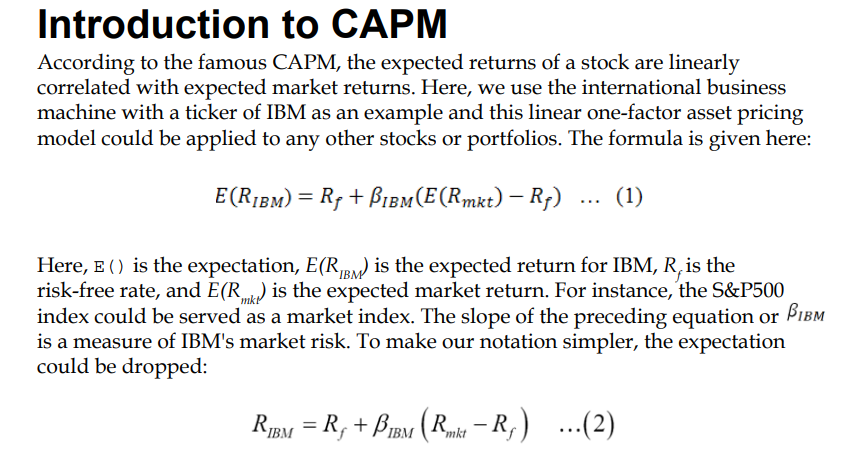

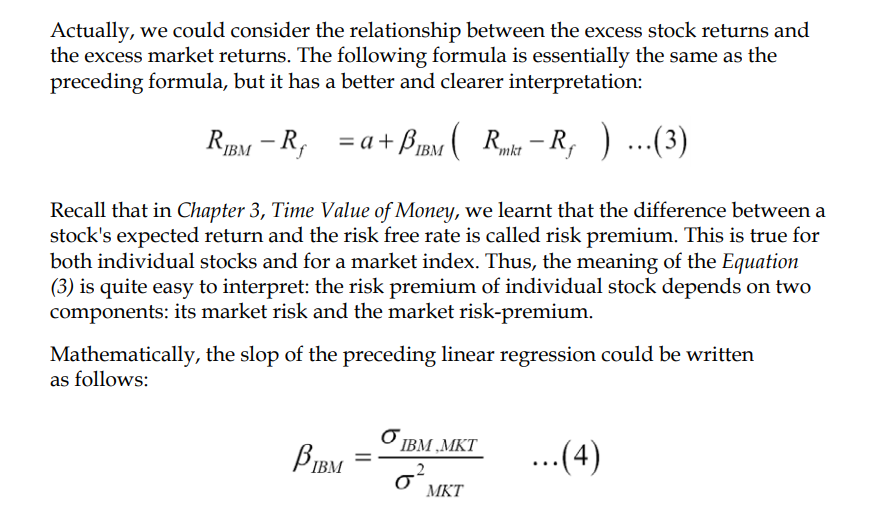

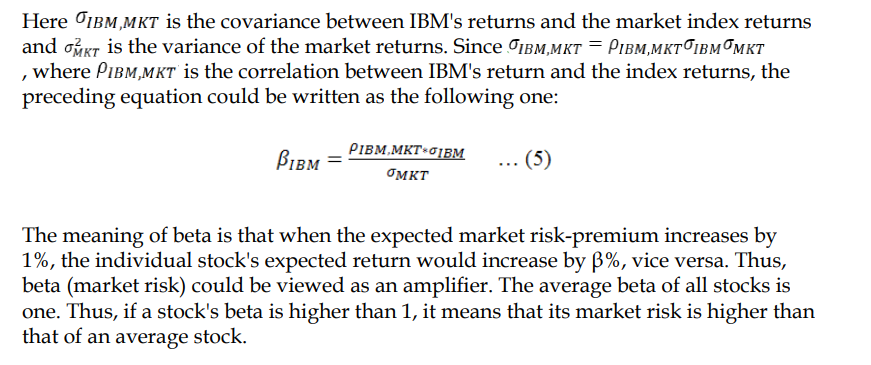

In [1]:
import numpy as np
import statsmodels.api as sm

y=[1,2,3,4,2,3,4]
x=range(1,8)
x=sm.add_constant(x)

results=sm.OLS(y,x).fit()
print(results.params)

[1.28571429 0.35714286]


In [2]:
# To see all information about the OLS results

results.summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.377
Method:                 Least Squares   F-statistic:                     4.630
Date:                Thu, 22 Apr 2021   Prob (F-statistic):             0.0841
Time:                        15:04:32   Log-Likelihood:                -7.8466
No. Observations:                   7   AIC:                             19.69
Df Residuals:                       5   BIC:                             19.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2857      0.742      1.732      0.144      -0.622       3.194
x1             0.3571      0.166      2.152      0.084      -0.070       0.784
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   1.976
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.342
Skew:                           0.289   Prob(JB):                        0.843
Kurtosis:                       2.083   Cond. No.                         10.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

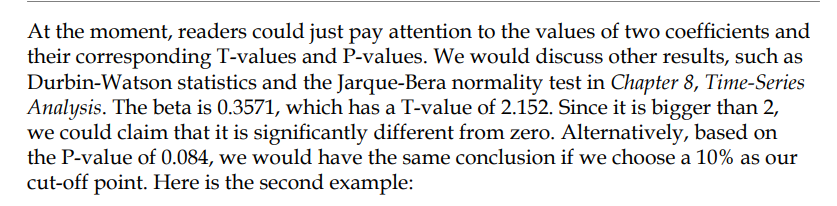

In [3]:
from scipy import stats
ret = [0.065, 0.0265, -0.0593, -0.001,0.0346]
mktRet = [0.055, -0.09, -0.041,0.045,0.022]
(beta, alpha, r_value,p_value,std_err)=stats.linregress(ret,mktRet)

In [4]:
print(beta, alpha)

0.5077431878770808 -0.008481900352462384


In [5]:
print("R-squared=", r_value**2)

R-squared= 0.1478856629663111


In [6]:
print("p-value =", p_value)

p-value = 0.5227155239089462


Again, the `help()` function could be used to get more information about this
function, see the following first few lines:

In [7]:
help(stats.linregress)

Help on function linregress in module scipy.stats._stats_mstats_common:

linregress(x, y=None)
    Calculate a linear least-squares regression for two sets of measurements.
    
    Parameters
    ----------
    x, y : array_like
        Two sets of measurements.  Both arrays should have the same length.  If
        only `x` is given (and ``y=None``), then it must be a two-dimensional
        array where one dimension has length 2.  The two sets of measurements
        are then found by splitting the array along the length-2 dimension.  In
        the case where ``y=None`` and `x` is a 2x2 array, ``linregress(x)`` is
        equivalent to ``linregress(x[0], x[1])``.
    
    Returns
    -------
    slope : float
        Slope of the regression line.
    intercept : float
        Intercept of the regression line.
    rvalue : float
        Correlation coefficient.
    pvalue : float
        Two-sided p-value for a hypothesis test whose null hypothesis is
        that the slope is zero, 

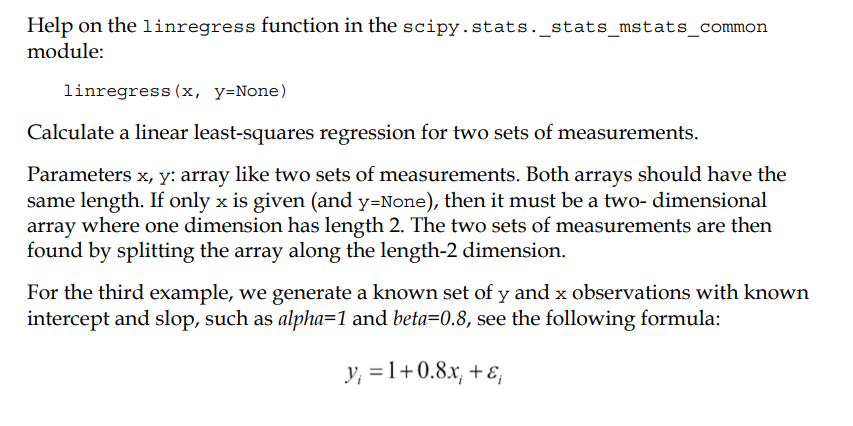

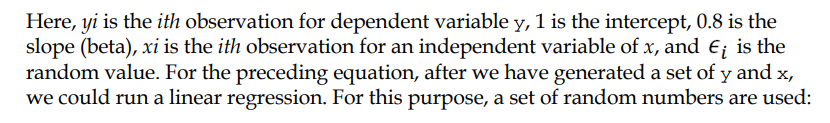

In [8]:
from scipy import stats
import scipy as sp

sp.random.seed(12456)
alpha=1
beta=0.8
n=100
x=sp.arange(n)
y=alpha+beta*x+sp.random.rand(n)

(beta,alpha,r_value,p_value,std_err)=stats.linregress(y,x)
print(alpha,beta)
print("R-squared=", r_value**2)
print("p-value =", p_value)


-1.9648401142472736 1.2521836174247123
R-squared= 0.9998714319392581
p-value = 1.7896498995951822e-192


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  


Now let's look at how to estimate the beta (market risk) for Microsoft. Assume that
we are interested in the period from `1/1/2012 to 12/31/2016`, for a total of five year's
data. 

In [14]:
# from scipy import stats
# from matplotlib.finance import quotes_historical_yahoo_ochl as getData

# begdate=(2012,1,1)
# enddate=(2016,12,31)
# ticker='MSFT'

# p =getData(ticker, begdate, enddate,asobject=True,adjusted=True)

# retIBM = p.aclose[1:]/p.aclose[:1]-1
# ticker='^GSPC'

# p2 = getData(ticker, begdate, enddate,asobject=True,adjusted=True)
# retMkt = p2.aclose[1:]/p2.aclose[:1]-1
# (beta,alpha,r_value,p_value,std_err)=stats.linregress(retMkt,retIBM)
# print(alpha,beta)
# print("R-squared=", r_value**2)
# print("p-value =", p_value)

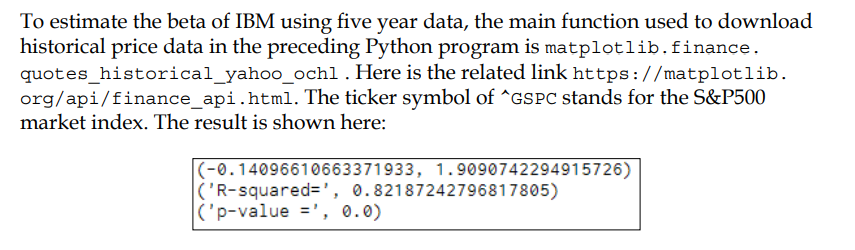

https://matplotlib.org/api/finance_api.html

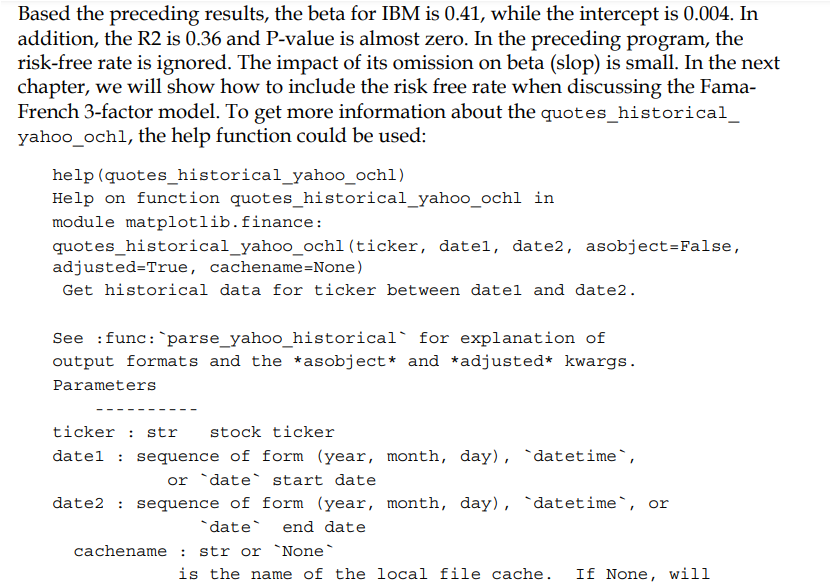

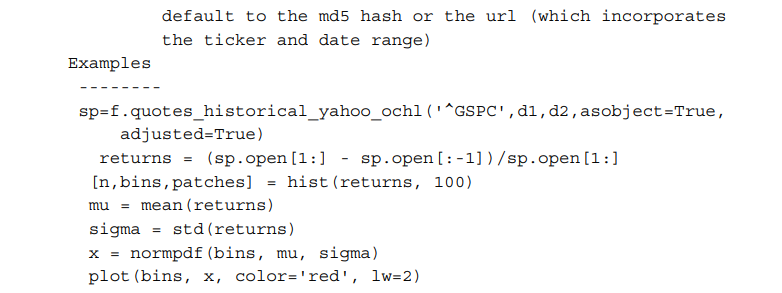

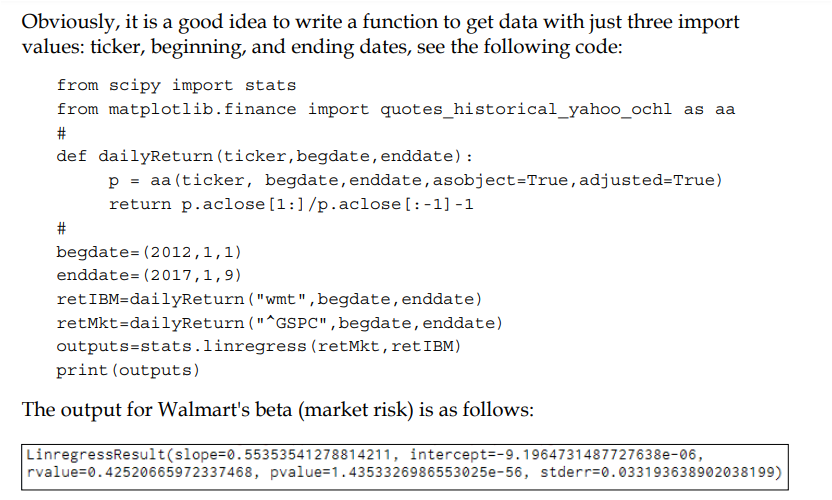

Alternatively, we could call the `p4f.dailyReturnYahoo()` function, see the
following code:

In [5]:
# import p4f
# x=p4f.dailyReturn("ibm",(2016,1,1),(2016,1,10))
# print(x)

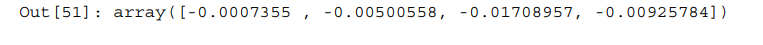

### Moving beta

Sometimes, researchers need to generate a beta time series based on, for example,
a three-year moving window. In such cases, we could write a loop or double loops.

Let's look at a simpler case: estimating the annual beta for IBM over several years.
First, let's look at two ways of getting years from a date variable:

In [6]:
import datetime

today=datetime.date.today()

year=today.year # Method I
print(year)

print(today.strftime("%Y")) # Method II


2021
2021


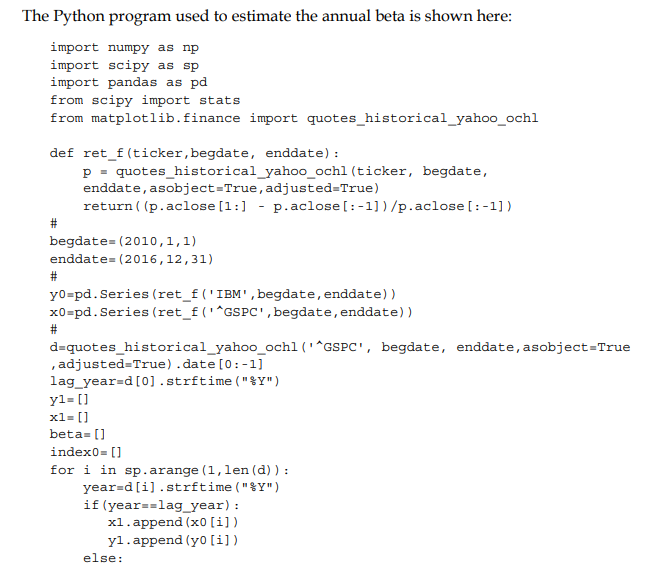

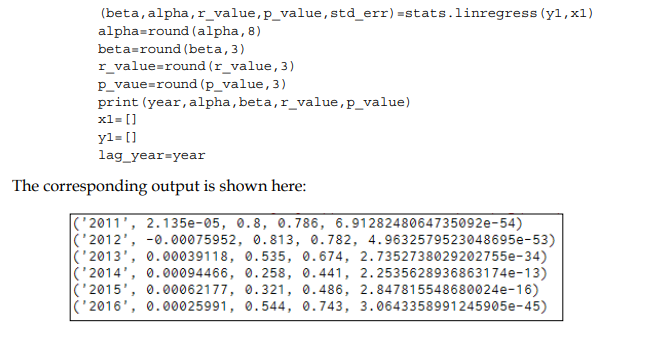

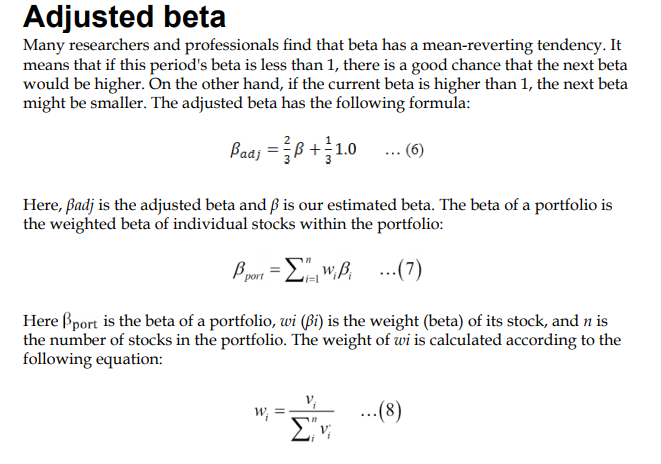

Here `vi` is the value of stock `i`, and summation of all `vi`, the denominator in the
preceding equation is the value of the portfolio.`

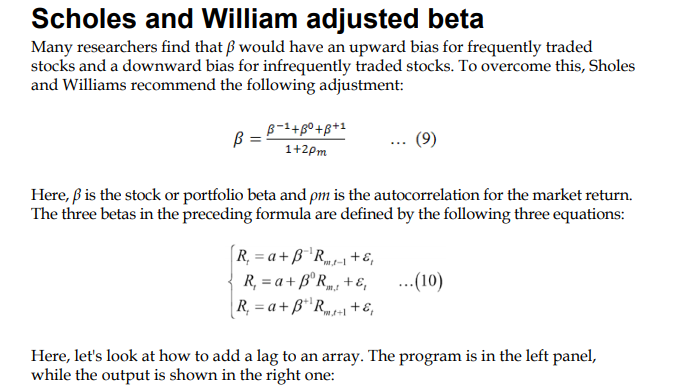

In [7]:
import pandas as pd
import scipy as sp
x=sp.arange(1,5,0.5)
y=pd.DataFrame(x,columns=['Ret'])
y['Lag']=y.shift(1)
print(y)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  This is separate from the ipykernel package so we can avoid doing imports until


   Ret  Lag
0  1.0  NaN
1  1.5  1.0
2  2.0  1.5
3  2.5  2.0
4  3.0  2.5
5  3.5  3.0
6  4.0  3.5
7  4.5  4.0


In the preceding program the `.shift()` function is applied. Since we need the
market return one period ahead, we could specify a negative value of `-1` in the
`.shift()` function:

In [8]:
import pandas as pd
import scipy as sp
x=sp.arange(1,5,0.5)
y=pd.DataFrame(x,columns=['Ret'])
y['Lag']=y.shift(1)
y['Forward']=y['Ret'].shift(-1)
print(y)

   Ret  Lag  Forward
0  1.0  NaN      1.5
1  1.5  1.0      2.0
2  2.0  1.5      2.5
3  2.5  2.0      3.0
4  3.0  2.5      3.5
5  3.5  3.0      4.0
6  4.0  3.5      4.5
7  4.5  4.0      NaN


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
  This is separate from the ipykernel package so we can avoid doing imports until


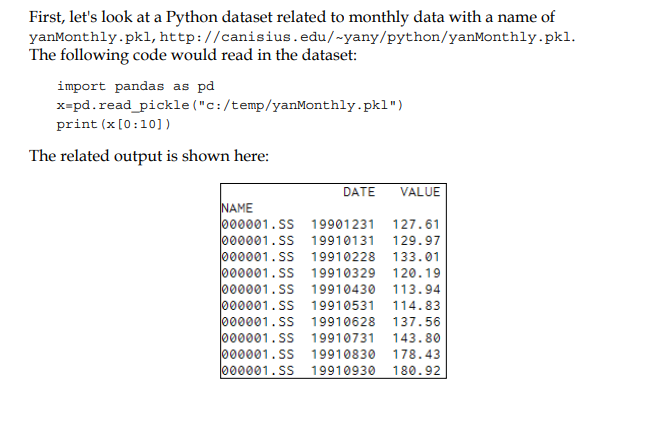

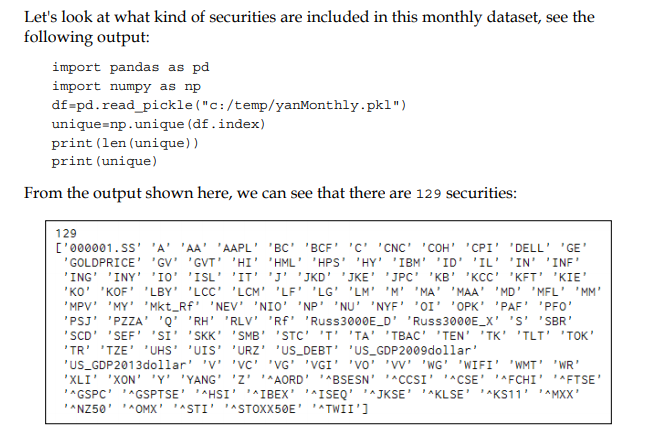

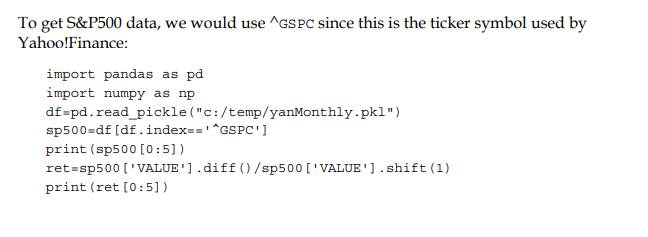

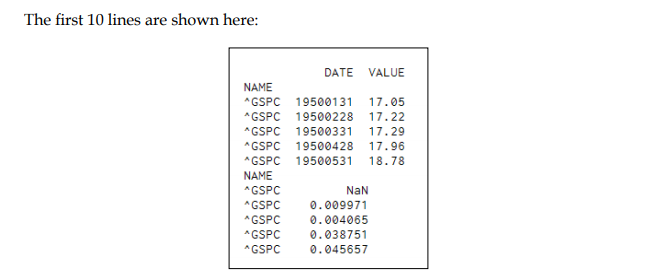

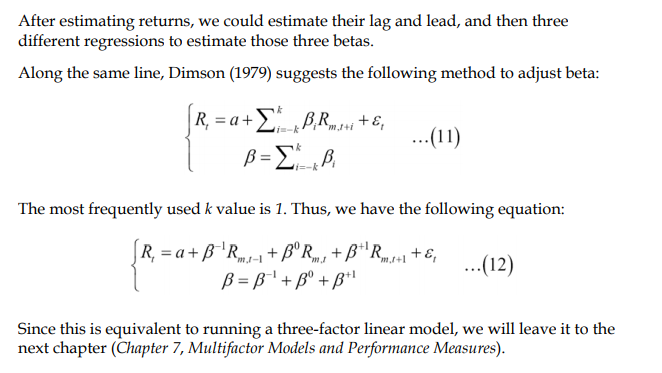

### Outputting data to text files

The following code will download the daily price data for Microsoft and save it to a text file:

In [10]:
import pandas_datareader.data as getData
import re
ticker='msft' # microsoft
f=open("msft.txt","w")
p = getData.DataReader(ticker, "yahoo")
f.write(str(p))
f.close()

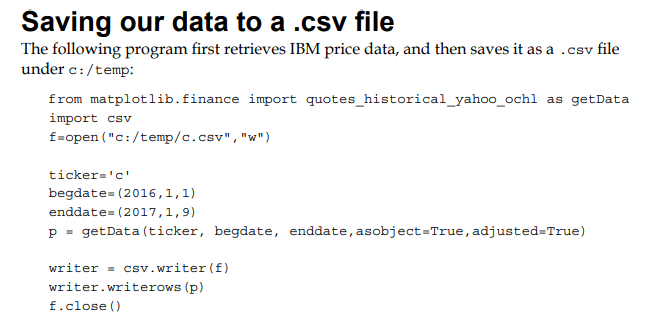

### Saving our data to an Excel file

The following program first retrieves IBM price data, and then saves it as a `.csv` file 

In [17]:
! pip install openpyxl

In [16]:
# import pandas as pd
# df=pd.read_csv("http://chart.yahoo.com/table.csv?s=IBM")
# f= pd.ExcelWriter('ibm.xlsx')
# df.to_excel(f, sheet_name='IBM')
# f.save()

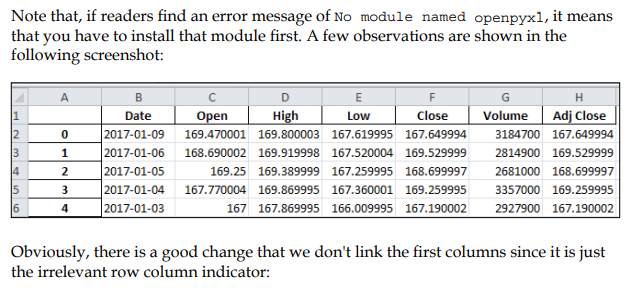

In [19]:
# import pandas as pd
# df=pd.read_csv("http://chart.yahoo.com/table.csv?s=IBM")
# f= pd.ExcelWriter('c:/temp/ibm.xlsx')
# df.to_excel(f,index=False,sheet_name='IBM')
# f.save()

### Saving our data to a pickle dataset

The following program first generates a simple array that has just three values. We
save them to a binary file

In [20]:
import pandas as pd
import numpy as np
np.random.seed(1234)
a = pd.DataFrame(np.random.randn(6,5))
a.to_pickle('a.pickle')

### Saving our data to a binary file

The following program first generates a simple array that has just three values. We
save them to a binary file

In [21]:
import array
import numpy as np

outfile = "tmp.bin"
fileobj = open(outfile, mode='wb')
outvalues = array.array('f')
data=np.array([1,2,3])
outvalues.fromlist(data.tolist())
outvalues.tofile(fileobj)
fileobj.close()

### Reading data from a binary file

Assume that we have generated a binary file called tmp.bin from the
above discussion. The file has just  three numbers: 1, 2, and 3. The following
Python code is used to read them:

In [22]:
import array
infile=open("tmp.bin", "rb")
s=infile.read() # read all bytes into a string
d=array.array("f", s) # "f" for float
print(d)
infile.close()

array('f', [1.0, 2.0, 3.0])


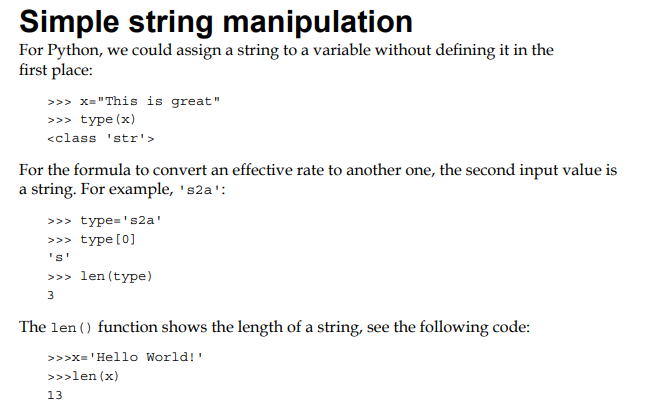

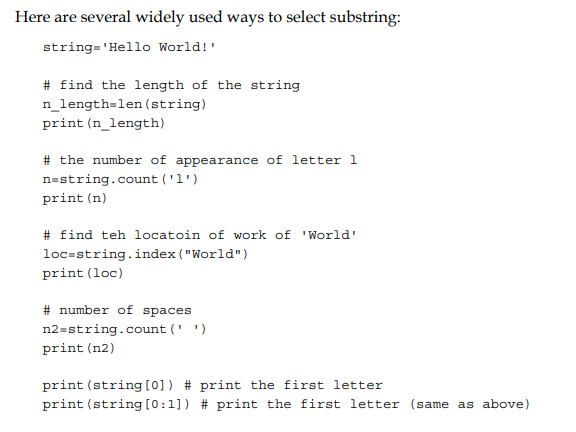

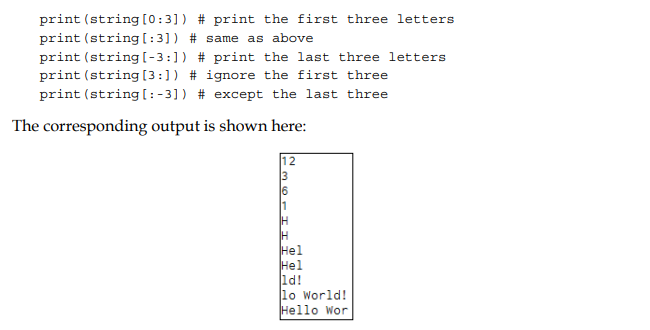

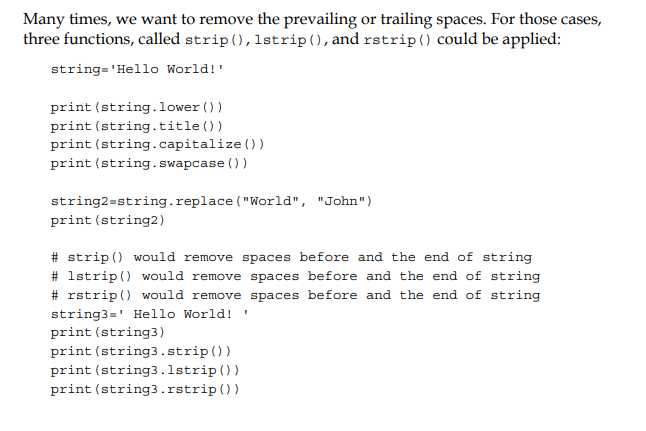

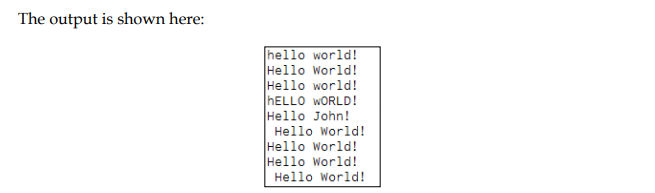

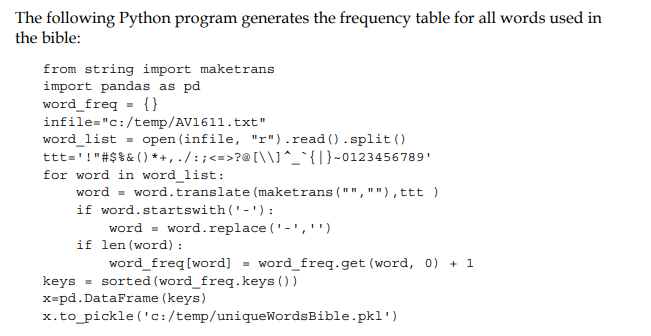

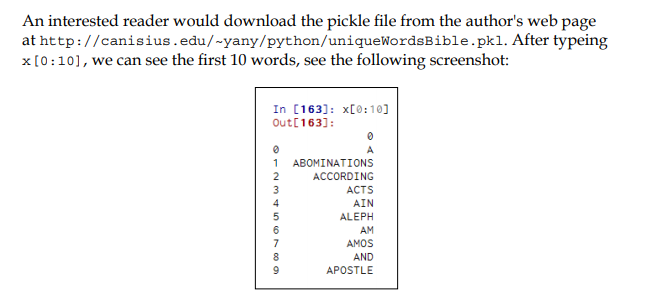

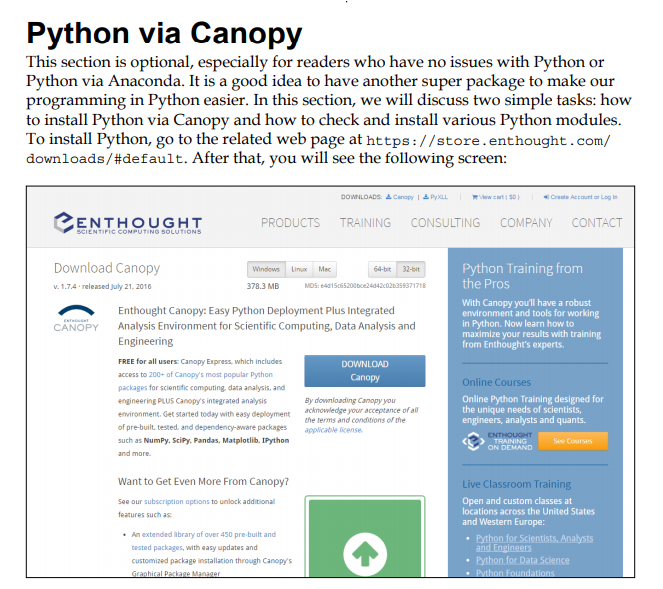

Depending on the operating system; we could download Canopy, such as winders
32-bit. After launching Canopy, the following screen will appear:

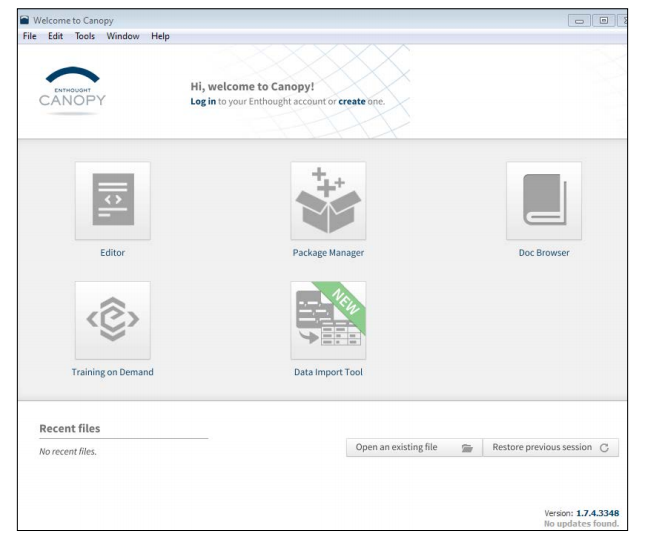

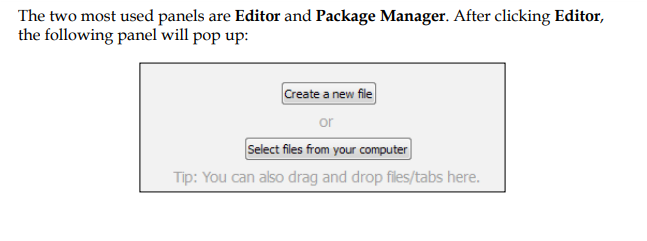

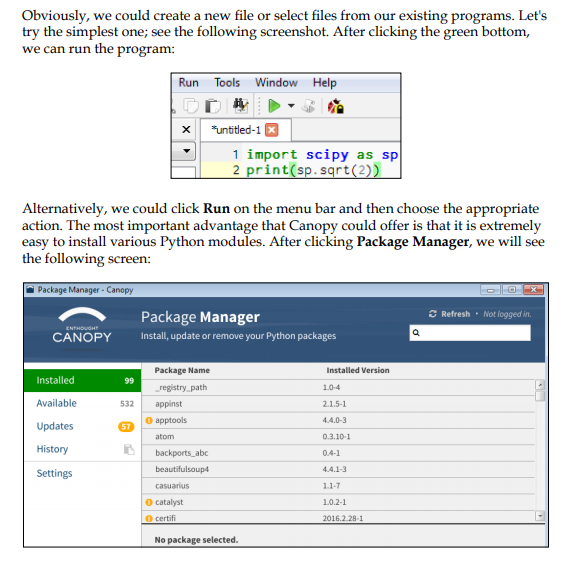

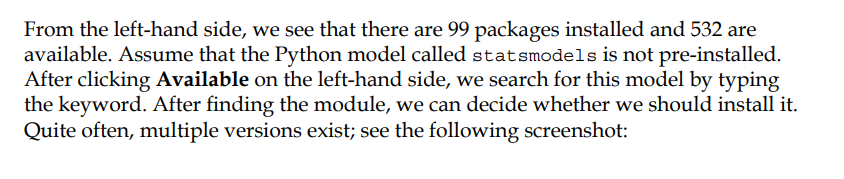

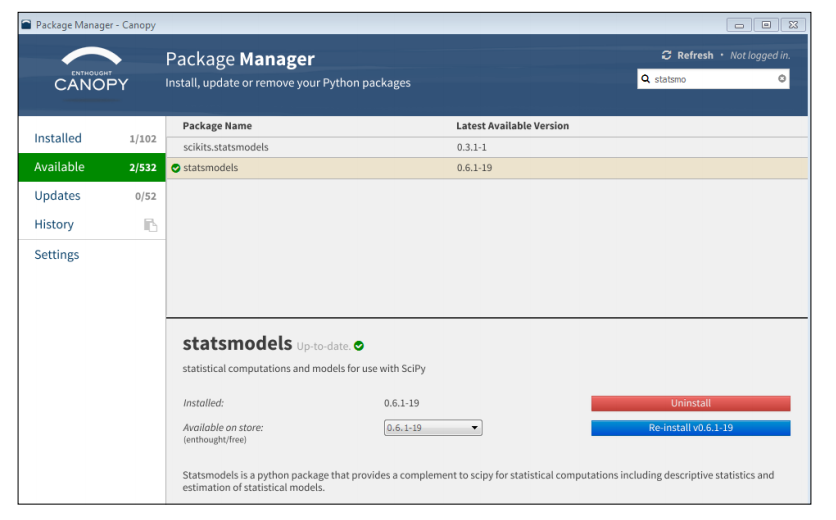

### Summary

**Capital Asset Pricing Model (CAPM)** is probably the most widely used model
in assets pricing. There are several reasons behind its popularity. First, it is quite
simple. It is just a one-factor linear model. Second, it is quite easy to implement this
one-factor model. Any interested reader could download historical price data for a
listed company and a market index data to calculate their return, and then estimate
the market risk for the stock. Third, this simplest one-factor asset pricing model
could be served as the first model for other more advanced ones, such as FamaFrench 3-factor, Fama-French-Carhart 4-factor models, and Fama-French 5 factor
models, which will be introduced in the next chapter.